# Matt EDA for Housing Project

### Import Libraries and Load Data

In [34]:
# Import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [35]:
# Load the provided data set (csv)
plt.style.use('seaborn')
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
print(df.shape)
display(df.info())
display('-'*60)
display(df.isnull().any())
display(df.isnull().sum())
display('-'*60)
df.head()

(21597, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


None

'------------------------------------------------------------'

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

'------------------------------------------------------------'

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [36]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


None

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21143.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,291.851724,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,442.498337,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.zipcode.nunique()

70

In [4]:
n = df.nunique(axis=0) 
print("No.of.unique values in each column :\n", n)

No.of.unique values in each column :
 id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      303
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64


In [41]:
# Seperate groups of features into seperate dataframes: counts, size, condition
df_counts = df[['price','floors', 'bedrooms', 'bathrooms', 'waterfront', 'view']]
df_counts.head()

,price,floors,bedrooms,bathrooms,waterfront,view
0,221900.0,1.0,3,1.00,NaN,0.0
1,538000.0,2.0,3,2.25,0.0,0.0
2,180000.0,1.0,2,1.00,0.0,0.0
3,604000.0,1.0,4,3.00,0.0,0.0
4,510000.0,1.0,3,2.00,0.0,0.0


In [39]:
df_condition = df[['price','condition', 'grade', 'yr_built', 'yr_renovated']]
df_condition.head()

,price,condition,grade,yr_built,yr_renovated
0,221900.0,3,7,1955,0.0
1,538000.0,3,7,1951,1991.0
2,180000.0,3,6,1933,NaN
3,604000.0,5,7,1965,0.0
4,510000.0,3,8,1987,0.0


In [40]:
df_size = df[['price','sqft_lot', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']]
df_size.head()

,price,sqft_lot,sqft_living,sqft_above,sqft_basement,sqft_lot15,sqft_living15
0,221900.0,5650,1180,1180,0.0,5650,1340
1,538000.0,7242,2570,2170,400.0,7639,1690
2,180000.0,10000,770,770,0.0,8062,2720
3,604000.0,5000,1960,1050,910.0,5000,1360
4,510000.0,8080,1680,1680,0.0,7503,1800


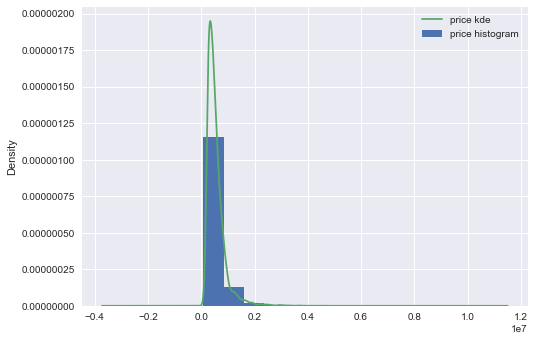

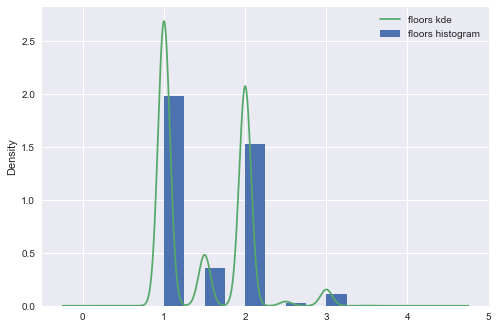

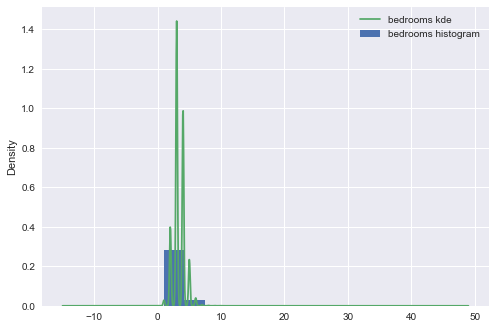

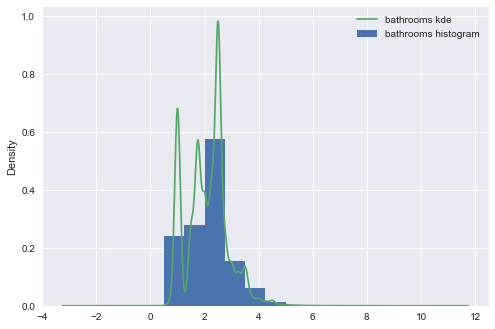

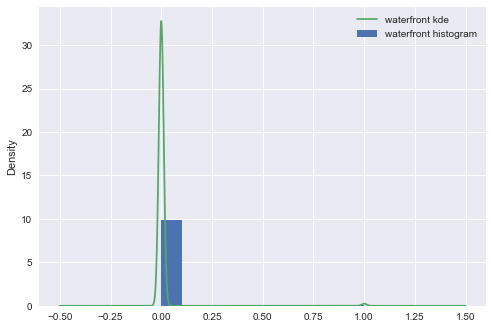

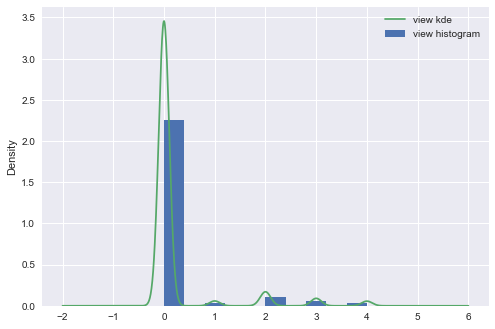

In [37]:
# Take a look at the distributions of some key features
for column in df_counts:
    df_counts[column].plot.hist(density=True, label = column+' histogram')
    df_counts[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

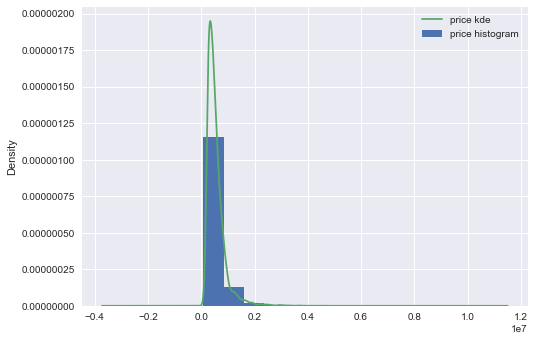

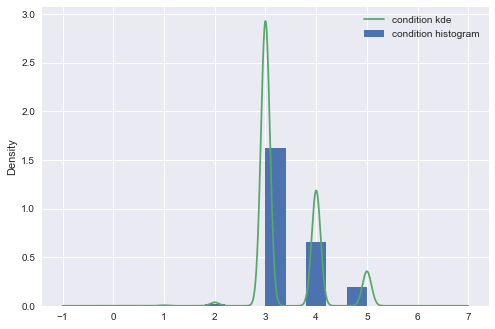

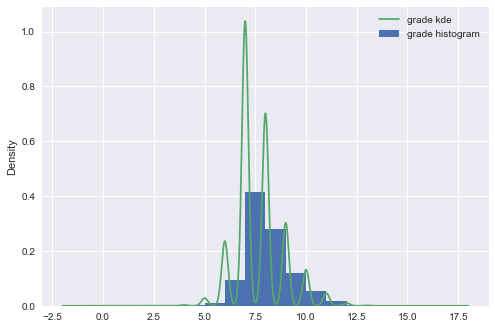

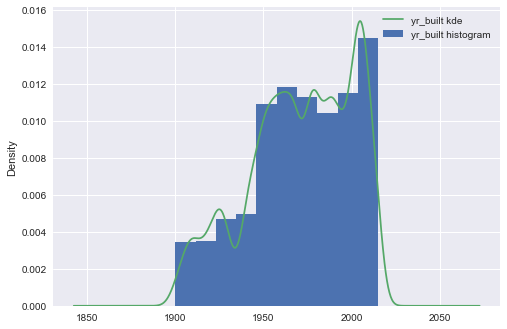

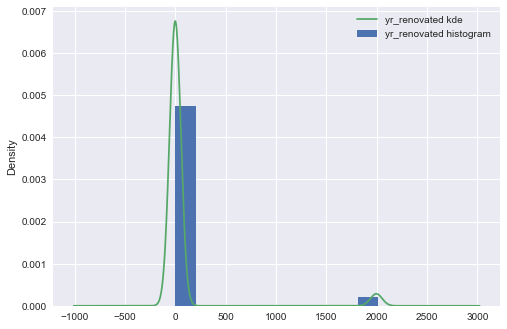

In [42]:
for column in df_condition:
    df_condition[column].plot.hist(density=True, label = column+' histogram')
    df_condition[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

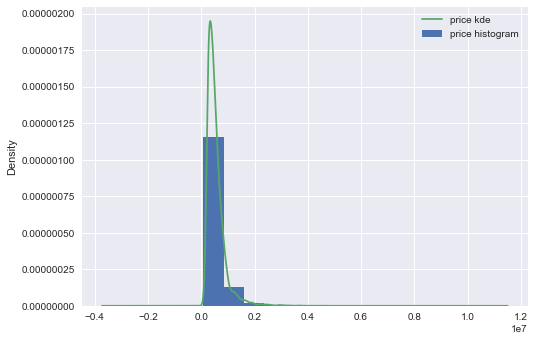

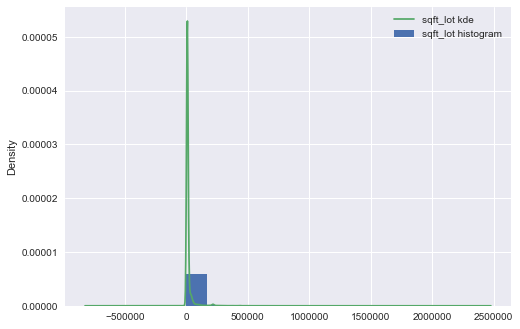

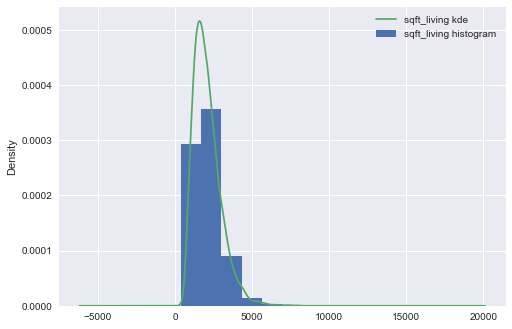

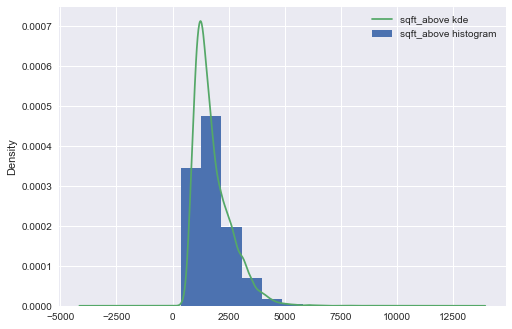

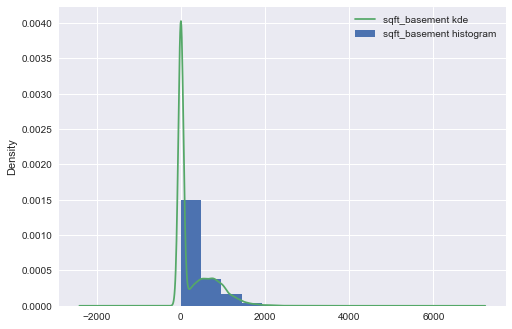

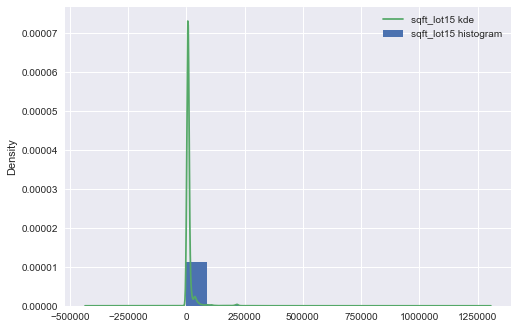

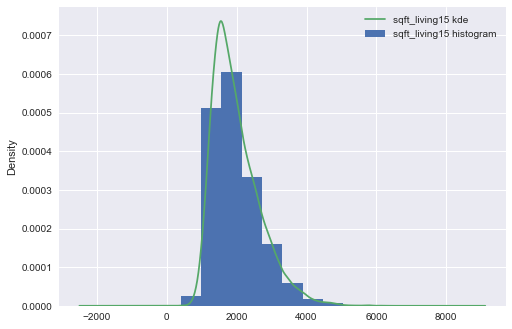

In [43]:
for column in df_size:
    df_size[column].plot.hist(density=True, label = column+' histogram')
    df_size[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

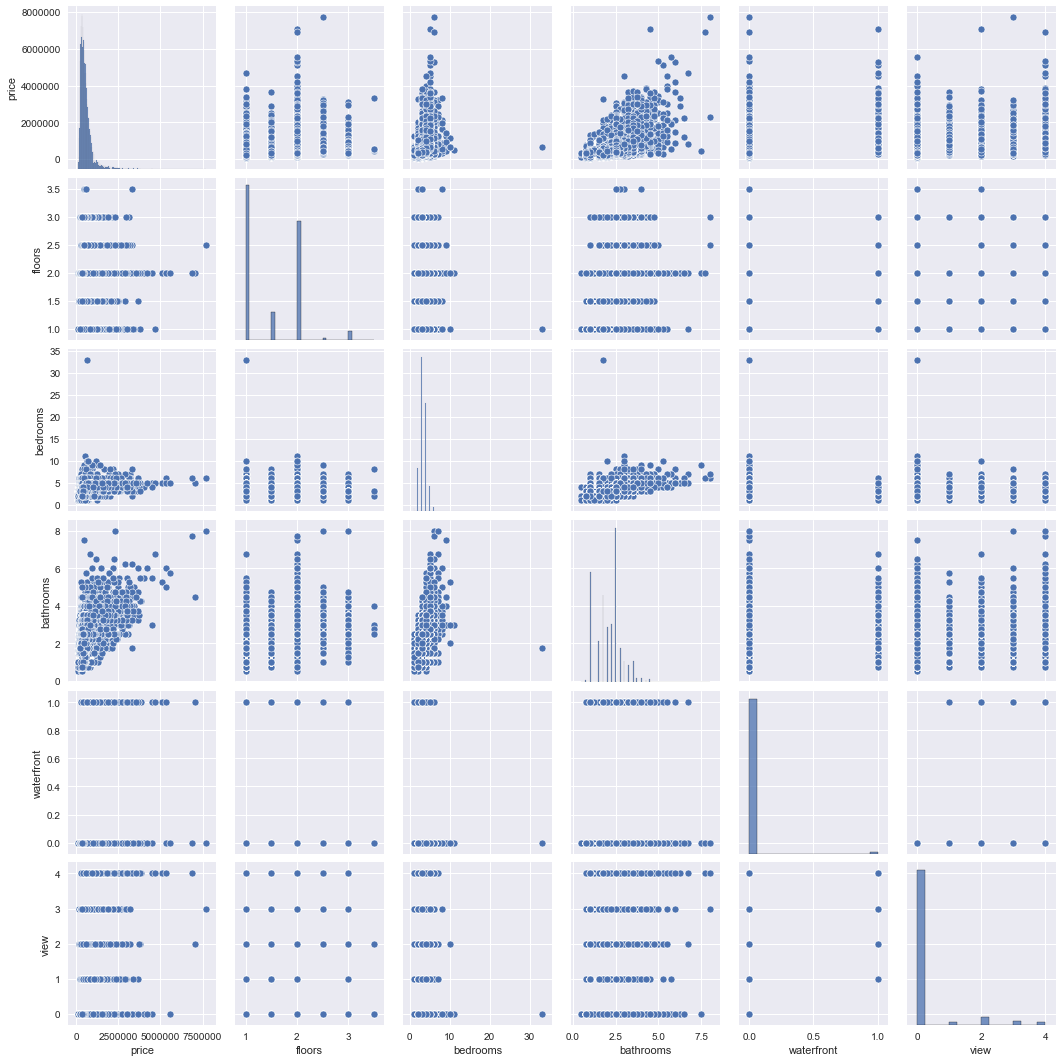

In [44]:
# Take a look at scatter plots and look for linear relationships
# sns.pairplot(data[['GrLivArea', 'OverallQual', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'SalePrice']])
sns.pairplot(df_counts)

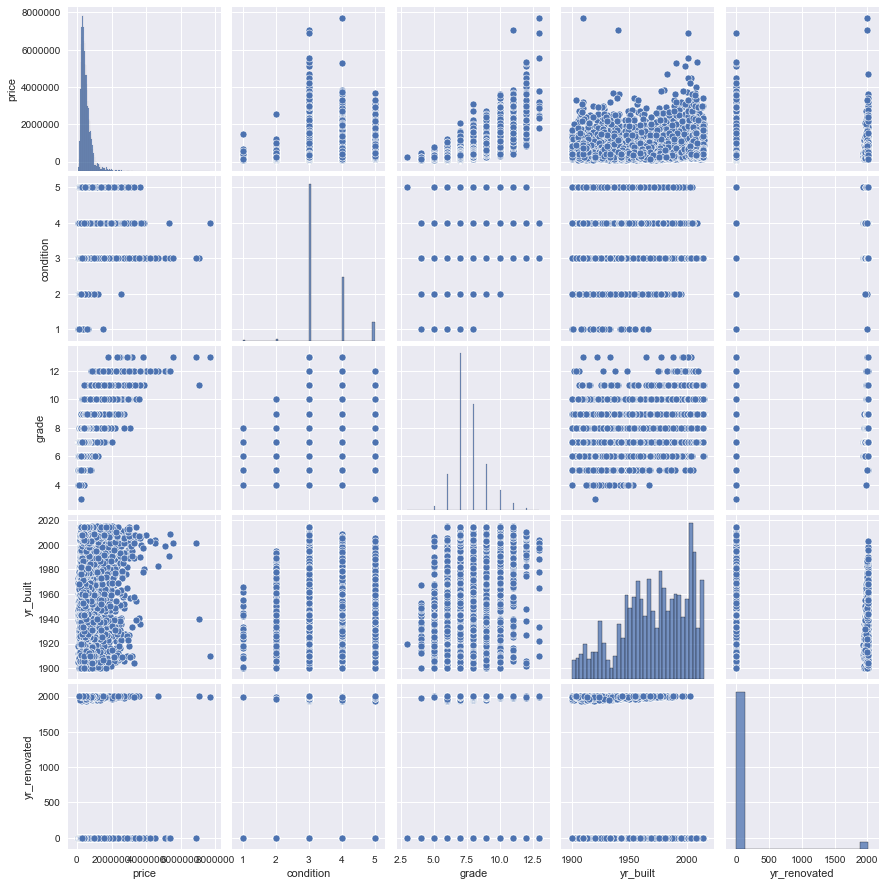

In [15]:
sns.pairplot(df_condition)

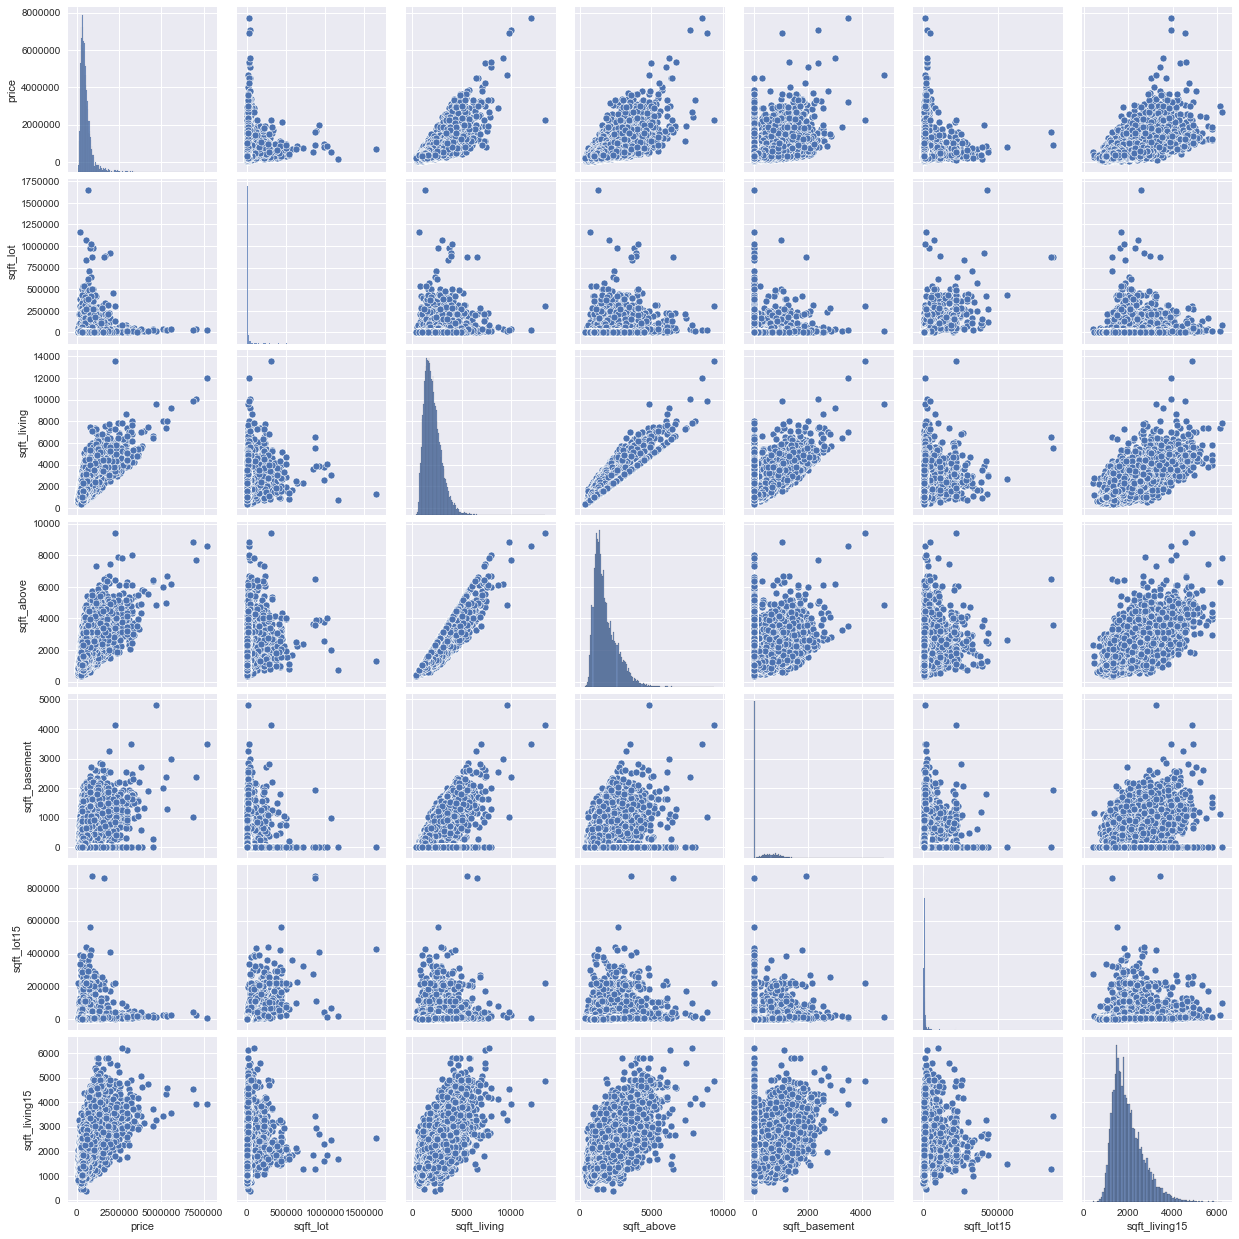

In [45]:
sns.pairplot(df_size)

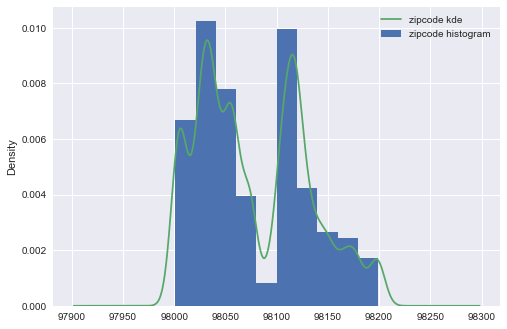

In [46]:
# forgot to look at zipcode... 
df.zipcode.plot.hist(density=True, label = 'zipcode histogram')
df.zipcode.plot.kde(label ='zipcode kde')
plt.legend()
plt.show()

In [47]:
# Take a look at correlations between variables
# first drop a few unnecessary columns (id, date, lat, long)
df_1 = df.drop(['id', 'date', 'lat', 'long'], axis=1)

In [19]:
df_1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.325008,0.053953,0.129599,-0.053402,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.302683,0.155670,0.018495,-0.154092,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.282693,0.507173,0.051050,-0.204786,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.434576,0.318152,0.055660,-0.199802,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.015533,0.052946,0.004513,-0.129586,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,-0.245144,0.489193,0.003535,-0.059541,0.280102,-0.010722
waterfront,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,0.090200,-0.026079,0.087244,0.031057,0.088860,0.032002
view,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,0.276521,-0.054564,0.100964,0.085277,0.279561,0.073332
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,0.170972,-0.361592,-0.061858,0.002888,-0.093072,-0.003126
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.087383,0.249727,-0.146896,1.000000,0.756073,0.168023,0.447865,0.016669,-0.185771,0.713867,0.120981


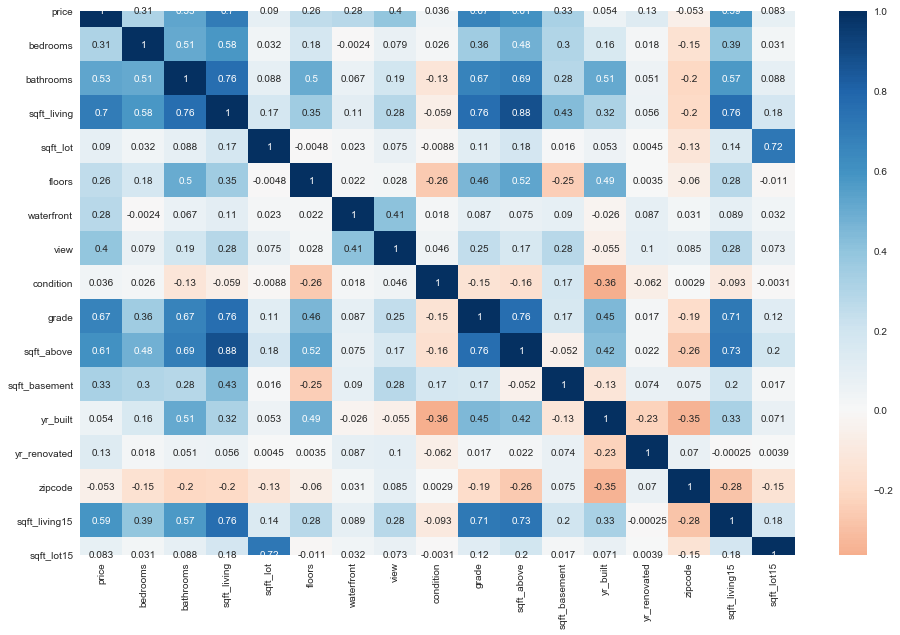

In [48]:
corr = df_1.corr()
display(corr)
plt.figure(figsize=(16,10))
sns.heatmap(corr, cmap='RdBu', annot=True, center=0)
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.75, center=0, annot=True)

In [10]:
# Change nulls to 0 for 4 columns
df_2 = df_1.replace(np.NaN, 0.0)

In [22]:
df_2.head(20)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,0.0,1995,0.0,98003,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,7,1060,0.0,1963,0.0,98198,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,2390,7570


In [23]:
df_2.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [14]:
# get rid of outliers for price (2 SD from mean)
# get rid of 33 value in bedrooms
df2_remove = df_2[(np.abs(stats.zscore(df_2['price']) < 3))]

In [15]:
df2_remove.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503


In [16]:
df2_remove = df2_remove.loc[df2_remove['bedrooms'] < 33]

In [17]:
df2_remove.shape

(21190, 17)

In [28]:
df2_remove['bedrooms'].unique()
df2_remove['bedrooms'].value_counts()

3     9666
4     6470
2     2744
5     1392
6      238
1      196
7       32
8        9
9        4
10       3
11       1
Name: bedrooms, dtype: int64

In [29]:
df2_remove['bathrooms'].value_counts()

2.50    5270
1.00    3849
1.75    3029
2.25    1988
2.00    1917
1.50    1439
2.75    1134
3.00     695
3.50     585
3.25     463
3.75     102
4.00      83
0.75      71
4.50      55
4.25      37
5.00      10
1.25       8
4.75       5
5.25       4
0.50       4
5.50       2
5.75       1
6.00       1
7.50       1
6.75       1
6.50       1
Name: bathrooms, dtype: int64

In [30]:
df_2['floors'].unique()
df2_remove['floors'].value_counts()

1.0    10501
2.0     7691
1.5     1859
3.0      578
2.5      120
3.5        6
Name: floors, dtype: int64

In [31]:
print(df_2.shape)
print(df2_remove.shape)

(21597, 17)
(20755, 17)


In [32]:
df2_remove['view'].value_counts()

0.0    19066
2.0      843
3.0      383
1.0      286
4.0      177
Name: view, dtype: int64

In [33]:
df2_remove['waterfront'].value_counts()

0.0    20693
1.0       62
Name: waterfront, dtype: int64

In [34]:
df2_remove['condition'].value_counts()

3    13481
4     5486
5     1591
2      169
1       28
Name: condition, dtype: int64

In [35]:
df2_remove['grade'].value_counts()

7     8966
8     5996
9     2421
6     2038
10     861
5      242
11     195
4       27
12       8
3        1
Name: grade, dtype: int64

In [18]:
# Create dummies for grade
grade_dummies = pd.get_dummies(df2_remove['grade'], prefix='grade', drop_first=True)
# df2_remove = train4.drop(['OverallQual'], axis=1)
df3_remove = pd.concat([df2_remove, grade_dummies], axis=1)
df3_remove.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,5650,0,0,0,1,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,7639,0,0,0,1,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,8062,0,0,1,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,5000,0,0,0,1,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,7503,0,0,0,0,1,0,0,0,0


In [19]:
# Cut outliers for bathroom, then create dummies
df3_remove = df3_remove[(np.abs(stats.zscore(df3_remove['bathrooms']) < 3))]
df3_remove['bathrooms'].value_counts()

2.50    5270
1.00    3849
1.75    3029
2.25    1988
2.00    1917
1.50    1439
2.75    1134
3.00     695
3.50     585
3.25     463
0.75      71
1.25       8
0.50       4
Name: bathrooms, dtype: int64

In [19]:
# Create dummies for bathrooms
bathrooms_dummies = pd.get_dummies(df3_remove['bathrooms'], prefix='bath', drop_first=True)
# df2_remove = train4.drop(['OverallQual'], axis=1)
df3_remove = pd.concat([df3_remove, bathrooms_dummies], axis=1)
df3_remove.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,bath_4.5,bath_4.75,bath_5.0,bath_5.25,bath_5.5,bath_5.75,bath_6.0,bath_6.5,bath_6.75,bath_7.5
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,0,0,0,0,0,0,0,0,0,0


In [39]:
pd.set_option('display.max_columns', None)

In [40]:
df3_remove.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,2720,8062,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [20]:
df4_remove = df3_remove.drop(['bathrooms', 'grade'], axis=1)
pd.set_option('display.max_columns', None)

In [42]:
# Create train, text split
train, test = train_test_split(df3_remove)

In [43]:
train.shape

(15339, 38)

In [44]:
test.shape

(5113, 38)

In [21]:
# save df3_remove as csv file
df3_remove.to_csv(r'data/df3clean.csv')

In [29]:
df4_remove = df4_remove.rename(columns={'bath_0.75':'bath_0_75', 'bath_1.0':'bath_1_0', 'bath_1.25':'bath_1_25', \
                                        'bath_1.5':'bath_1_5', 'bath_1.75':'bath_1_75', 'bath_2.0':'bath_2_0', \
                                        'bath_2.25':'bath_2_25', 'bath_2.5':'bath_2_5', 'bath_2.75':'bath_2_75', \
                                        'bath_3.0':'bath_3_0', 'bath_3.25':'bath_3_25', 'bath_3.5':'bath_3_5'})

In [25]:
df4_remove.head(2)

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0_75,bath_1_0,bath_1_25,bath_1_5,bath_1_75,bath_2_0,bath_2_25,bath_2_5,bath_2_75,bath_3_0,bath_3_25,bath_3_5
0,221900.0,3,1180,5650,1.0,0.0,0.0,3,1180,0.0,1955,0.0,98178,1340,5650,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2570,7242,2.0,0.0,0.0,3,2170,400.0,1951,1991.0,98125,1690,7639,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [23]:
df4_high.head(2)

NameError: name 'df4_high' is not defined

In [33]:
from statsmodels.formula.api import ols
outcome = 'price'
predictors = df4_high.drop(['sqft_lot', 'waterfront', 'view', 'condition', 'floors', \
                             'yr_built', 'yr_renovated', 'zipcode', 'sqft_lot15', 'price', 'sqft_living'], axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=df4_high).fit()

SyntaxError: invalid syntax (<unknown>, line 1)

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     72.99
Date:                Thu, 19 Nov 2020   Prob (F-statistic):          2.70e-282
Time:                        23:35:57   Log-Likelihood:                -67308.
No. Observations:                5086   AIC:                         1.347e+05
Df Residuals:                    5063   BIC:                         1.348e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.159e+05    1.8e+04     34.257      0.000    5.81e+05    6.51e+05
bedrooms      -1845.1687   2626.878     -0.702      0.482   -6994.986    3304.648
sqft_above       38.6363      4.534      8.521      0.000      29.748      47.525
sqft_basement    80.1438      5.016     15.976      0.000      70.310      89.978
sqft_living15    16.3619      3.834      4.268      0.000       8.846      23.877
grade_4       -2.383e-10   1.34e-10     -1.772      0.076   -5.02e-10    2.53e-11
grade_5        1.163e+04    6.1e+04      0.191      0.849   -1.08e+05    1.31e+05
grade_6        2.531e+04   2.21e+04      1.147      0.251   -1.79e+04    6.86e+04
grade_7        -2.76e+04   1.15e+04     -2.397      0.017   -5.02e+04   -5022.680
grade_8        6896.5145    1.1e+04      0.628      0.530   -1.46e+04    2.84e+04
grade_9        4.806e+04   1.11e+04      4.332      0.000    2.63e+04    6.98e+04
grade_10       9.656e+04   1.19e+04      8.107      0.000    7.32e+04     1.2e+05
grade_11         1.9e+05   1.55e+04     12.293      0.000     1.6e+05     2.2e+05
grade_12        2.65e+05   5.04e+04      5.253      0.000    1.66e+05    3.64e+05
bath_0_75      4.667e+04   8.97e+04      0.520      0.603   -1.29e+05    2.23e+05
bath_1_0       3.685e+04   1.56e+04      2.357      0.018    6202.648    6.75e+04
bath_1_25      4.978e+05   1.25e+05      3.968      0.000    2.52e+05    7.44e+05
bath_1_5       4.114e+04   1.59e+04      2.580      0.010    9879.046    7.24e+04
bath_1_75      1545.6412   1.42e+04      0.109      0.913   -2.63e+04    2.94e+04
bath_2_0       4890.5822   1.47e+04      0.333      0.739   -2.39e+04    3.36e+04
bath_2_25      8240.4302   1.43e+04      0.575      0.566   -1.99e+04    3.64e+04
bath_2_5      -3.209e+04   1.37e+04     -2.350      0.019   -5.89e+04   -5317.367
bath_2_75     -3383.1315   1.45e+04     -0.234      0.815   -3.17e+04    2.49e+04
bath_3_0         1.6e+04   1.52e+04      1.054      0.292   -1.38e+04    4.58e+04
bath_3_25      1.106e+04   1.55e+04      0.716      0.474   -1.92e+04    4.14e+04
bath_3_5      -1.286e+04   1.51e+04     -0.853      0.394   -4.24e+04    1.67e+04
==============================================================================
Omnibus:                      733.397   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1132.573
Skew:                           1.018   Prob(JB):                    1.16e-246
Kurtosis:                       4.096   Cond. No.                     3.00e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.81e-25. This might indicate that there are
strong multicollinearity problems or that the design

In [50]:
import pandas as pd
prices = np.array([0,315000,605000,1200000])
pd.cut(prices, bins =3)

[(-1200.0, 400000.0], (-1200.0, 400000.0], (400000.0, 800000.0], (800000.0, 1200000.0]]
Categories (3, interval[float64]): [(-1200.0, 400000.0] < (400000.0, 800000.0] < (800000.0, 1200000.0]]

In [51]:
df3_high = df3_remove.loc[df3_remove['price'] > 605001]
df3_low = df3_remove.loc[df3_remove['price'] < 315000]
df3_mid = df3_remove.loc[(df3_remove['price'] > 315000) & (df3_remove['price'] < 605001)]

In [30]:
df4_high = df4_remove.loc[df4_remove['price'] > 605001]
df4_mid = df4_remove.loc[(df4_remove['price'] > 315000) & (df4_remove['price'] < 605001)]
df4_low = df4_remove.loc[df4_remove['price'] < 315000]

regression for king county housing for mid income~price


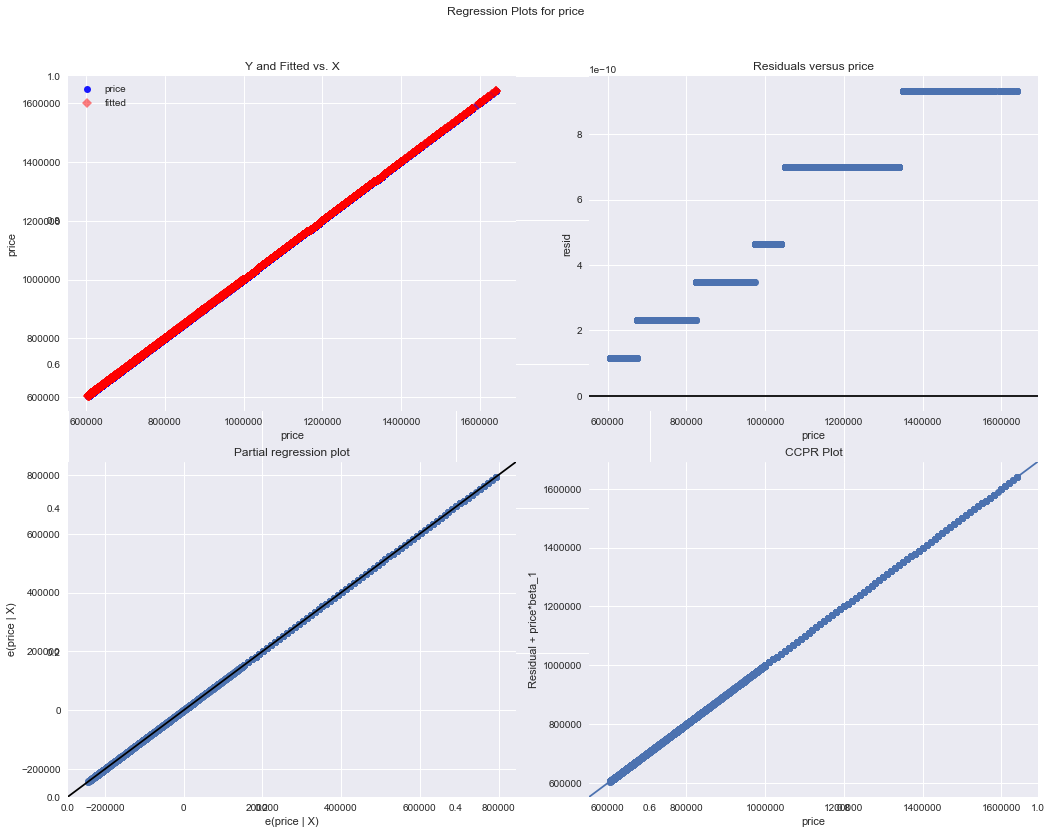

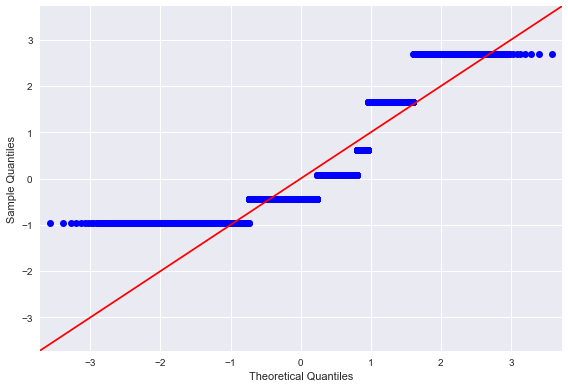

Press Enter to continue...
regression for king county housing for mid income~bedrooms


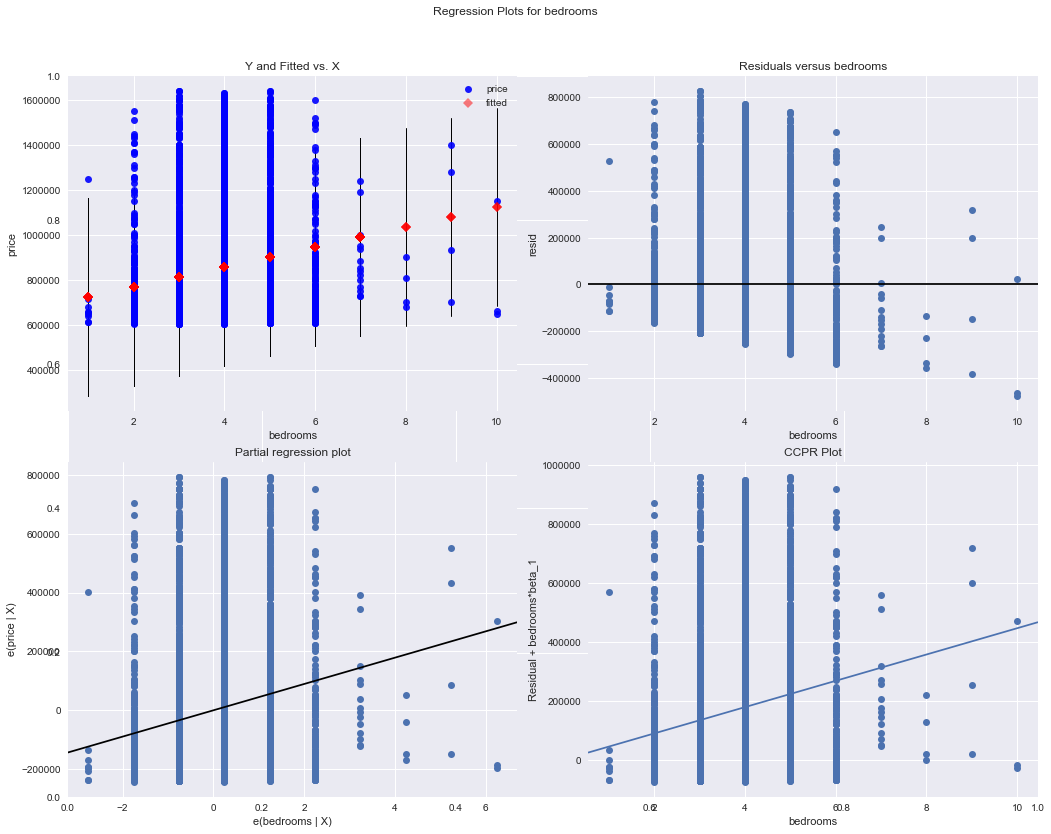

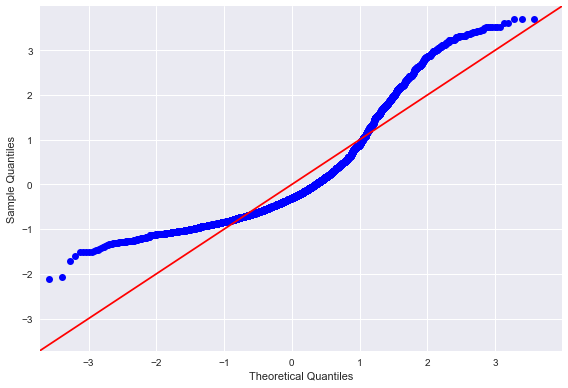

Press Enter to continue...
regression for king county housing for mid income~sqft_living


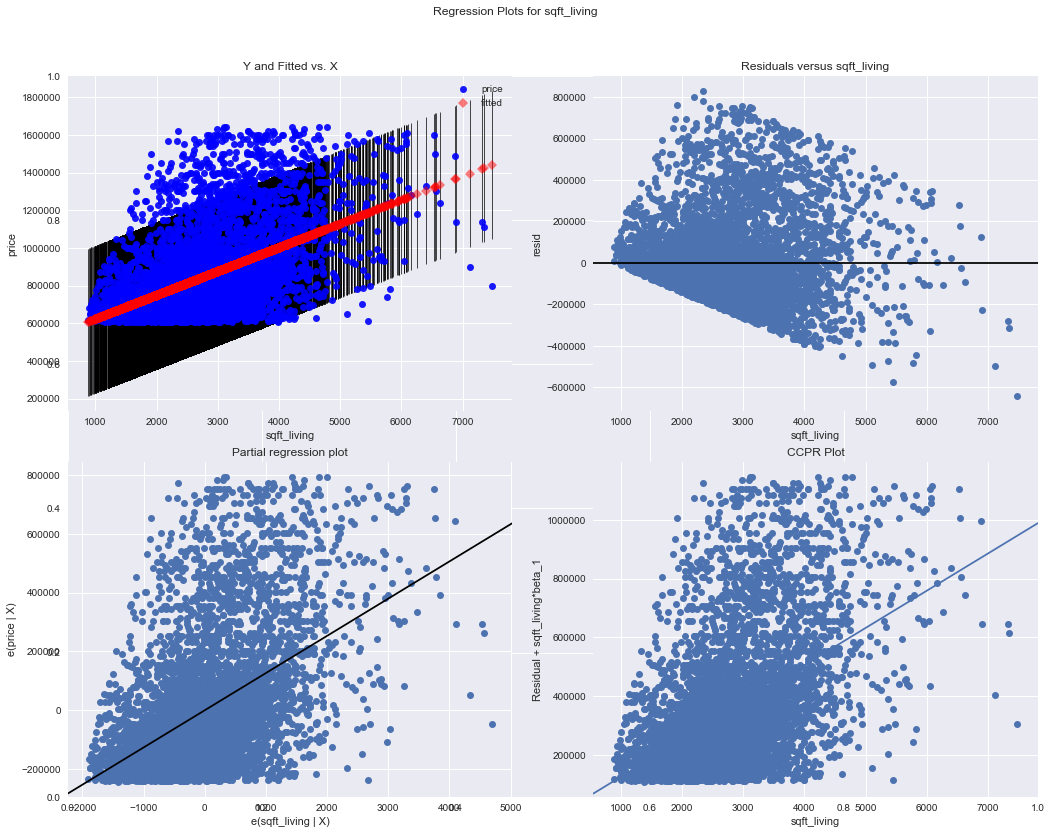

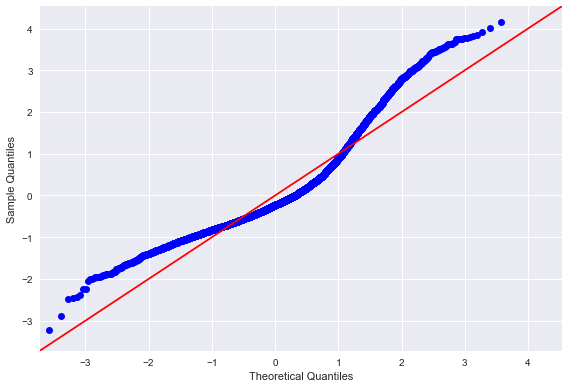

KeyboardInterrupt: Interrupted by user

In [49]:
results = []
for idx, column in enumerate(df4_high.columns):
    print (f"regression for king county housing for mid income~{column}")

    f = f'price~{column}'
    model = ols(formula=f, data=df4_high).fit()
    
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()
    
    results.append([column, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])
    input("Press Enter to continue...")

In [ ]:
df5.head(2)

In [1]:
#Some notes:
#If the predictor and dependent variable is already linear, no need to make it into categorical/dummies(grade)
#Try both to see which have lower p-values (categorical and continuous)

#Interpreting coefficients of categorical variables, [dum2, dum3, dum4]. For each dum2, that coefficient is greater
#than dum1 which can be thought of as 0. In terms of p values, if greater than alpha, that dummy is not
#significant and can be dropped.

#consider binning when turning continuous features into categoricals.

In [54]:
df6 = pd.read_csv('data/df6low.csv')

In [55]:
df6.head(2)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,10/13/2014,221900.0,3,1.0,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,2,5631500400,2/25/2015,180000.0,2,1.0,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a26d76358>,
      dtype=object)

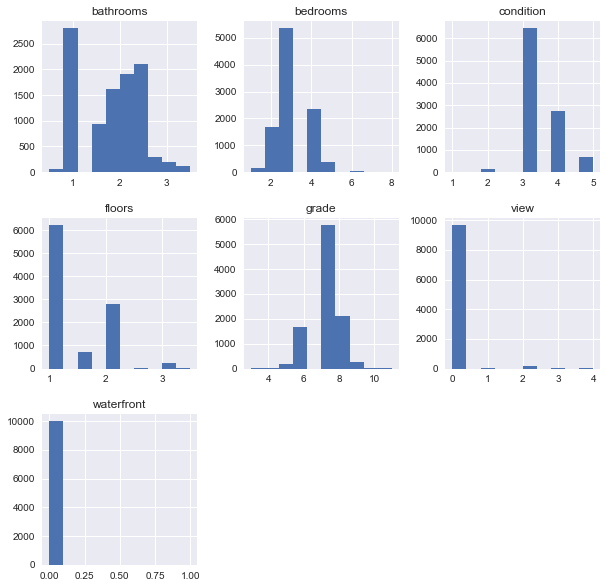

In [61]:
df6[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'grade', 'condition']].hist(figsize  = [10, 10])

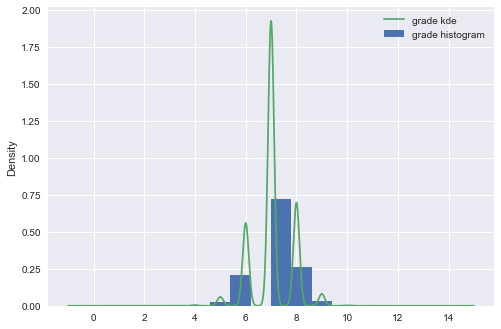

In [59]:
df6.grade.plot.hist(density=True, label = 'grade histogram')
df6.grade.plot.kde(label ='grade kde')
plt.legend()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a34467160>,
      dtype=object)

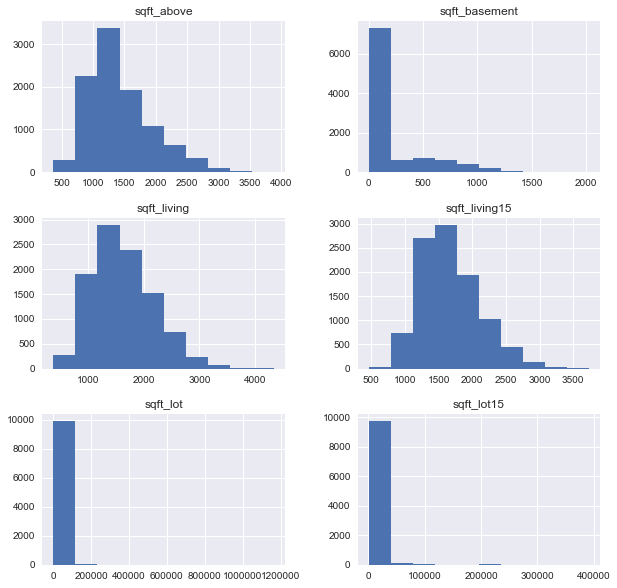

In [65]:
df6[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']].hist(figsize  = [10, 10])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a34ce6dd8>,
      dtype=object)

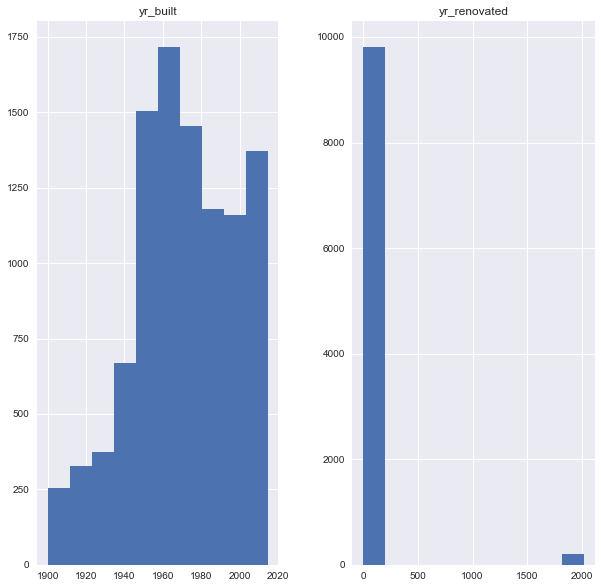

In [67]:
df6[['yr_built', 'yr_renovated']].hist(figsize  = [10, 10])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a35934828>]],
      dtype=object)

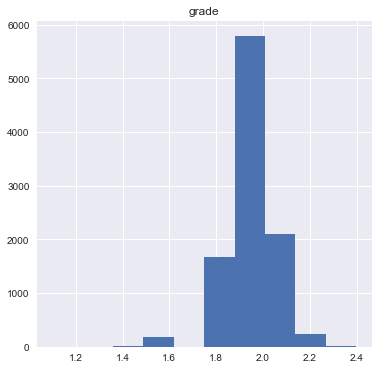

In [69]:
#grade seems to become more normal
data_log = pd.DataFrame([])
data_log['grade'] = np.log(df6['grade'])
data_log.hist(figsize  = [6, 6])

In [90]:
#Transforming(log transformation) and min max scaling grade
df0 = pd.DataFrame()
log_grade = data_log['grade']
scaled_grade = (log_grade - min(log_grade)) / (max(log_grade) - min(log_grade))
df0['sc_grade'] = scaled_grade

#Scaling the rest features so they are all on the same scale.
scaled_bath = (df6['bathrooms'] - min(df6['bathrooms'])) / (max(df6['bathrooms']) - min(df6['bathrooms']))
df0['sc_bath'] = scaled_bath

scaled_bed = (df6['bedrooms'] - min(df6['bedrooms'])) / (max(df6['bedrooms']) - min(df6['bedrooms']))
df0['sc_bed'] = scaled_bed

scaled_cond = (df6['condition'] - min(df6['condition'])) / (max(df6['condition']) - min(df6['condition']))
df0['sc_cond'] = scaled_cond

scaled_floor = (df6['floors'] - min(df6['floors'])) / (max(df6['floors']) - min(df6['floors']))
df0['sc_floor'] = scaled_floor

scaled_view = (df6['view'] - min(df6['view'])) / (max(df6['view']) - min(df6['view']))
df0['sc_view'] = scaled_view

scaled_waterfront = (df6['waterfront'] - min(df6['waterfront'])) / (max(df6['waterfront']) - min(df6['waterfront']))
df0['sc_waterfront'] = scaled_waterfront

scaled_living = (df6['sqft_living'] - min(df6['sqft_living'])) / (max(df6['sqft_living']) - min(df6['sqft_living']))
df0['sc_living'] = scaled_living

scaled_living15 = (df6['sqft_living15'] - min(df6['sqft_living15'])) / (max(df6['sqft_living15']) - min(df6['sqft_living15']))
df0['sc_living15'] = scaled_living15

scaled_lot15 = (df6['sqft_lot15'] - min(df6['sqft_lot15'])) / (max(df6['sqft_lot15']) - min(df6['sqft_lot15']))
df0['sc_lot15'] = scaled_lot15

scaled_lot = (df6['sqft_lot'] - min(df6['sqft_lot'])) / (max(df6['sqft_lot']) - min(df6['sqft_lot']))
df0['sc_lot'] = scaled_lot

scaled_above = (df6['sqft_above'] - min(df6['sqft_above'])) / (max(df6['sqft_above']) - min(df6['sqft_above']))
df0['sc_above'] = scaled_above

scaled_basement = (df6['sqft_basement'] - min(df6['sqft_basement'])) / (max(df6['sqft_basement']) - min(df6['sqft_basement']))
df0['sc_basement'] = scaled_basement

In [97]:
#Adding original price, year built and year renovated without scaling.
df0['price'] = df6['price']
df0['yr_built'] = df6['yr_built']
df0['yr_renovated'] = df6['yr_renovated']

In [98]:
#Inspect the new data frame (df0)
df0.head()

,sc_grade,sc_bath,sc_bed,sc_cond,sc_floor,sc_view,sc_waterfront,sc_living,sc_living15,sc_lot15,sc_lot,sc_above,sc_basement,price,yr_built,yr_renovated
0,0.652127,0.166667,0.285714,0.5,0.0,0.0,0.0,0.204030,0.268293,0.012772,0.004362,0.230769,0.000000,221900.0,1955,0.0
1,0.533484,0.166667,0.142857,0.5,0.0,0.0,0.0,0.100756,0.689024,0.018935,0.008098,0.113960,0.000000,180000.0,1933,0.0
2,0.652127,0.583333,0.285714,0.5,0.4,0.0,0.0,0.338791,0.542073,0.015759,0.005366,0.383191,0.000000,257500.0,1995,0.0
3,0.652127,0.333333,0.285714,0.5,0.0,0.0,0.0,0.173804,0.362805,0.023148,0.007850,0.196581,0.000000,291850.0,1963,0.0
4,0.652127,0.166667,0.285714,0.5,0.0,0.0,0.0,0.355164,0.402439,0.019065,0.005925,0.193732,0.359606,229500.0,1960,0.0


In [99]:
train, test = train_test_split(df0, test_size=0.25, random_state=42)

In [100]:
train.shape

(7509, 16)

In [101]:
test.shape

(2504, 16)

In [112]:
outcome = 'price'
predictors = train.drop(['price', 'yr_renovated', 'sc_waterfront', 'sc_basement', 'sc_lot15', 'sc_above'], axis=1)
pred_sum = "+".join(predictors)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=train).fit()

In [113]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     181.6
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:37:00   Log-Likelihood:                -93823.
No. Observations:                7509   AIC:                         1.877e+05
Df Residuals:                    7498   BIC:                         1.877e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.365e+06   8.07e+04     16.907      0.000    1.21e+06    1.52e+06
sc_grade     2.281e+05    1.2e+04     19.012      0.000    2.05e+05    2.52e+05
sc_bath      3.837e+04   5931.460      6.469      0.000    2.67e+04       5e+04
sc_bed      -5.858e+04   8405.178     -6.969      0.000   -7.51e+04   -4.21e+04
sc_cond      8837.1136   4949.841      1.785      0.074    -865.962    1.85e+04
sc_floor     5.336e+04   4658.898     11.453      0.000    4.42e+04    6.25e+04
sc_view      2.718e+04   7762.343      3.502      0.000     1.2e+04    4.24e+04
sc_living    7.308e+04   9993.194      7.313      0.000    5.35e+04    9.27e+04
sc_living15  5.378e+04   7858.197      6.844      0.000    3.84e+04    6.92e+04
sc_lot       1.706e+05   3.56e+04      4.789      0.000    1.01e+05     2.4e+05
yr_built     -637.2324     42.321    -15.057      0.000    -720.194    -554.271
==============================================================================
Omnibus:                      410.364   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.192
Skew:                           0.074   Prob(JB):                     6.03e-36
Kurtosis:                       2.295   Cond. No.                     2.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
train, test = train_test_split(df6, test_size=0.25, random_state=42)

In [115]:
train.shape

(7509, 23)

In [116]:
df6.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sc_grade
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.652127
1,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0.533484
2,6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819,0.652127
3,7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,0.652127
4,8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,0.652127


In [117]:
outcome = 'price'
predictors = train.drop(['price', 'Unnamed: 0', 'id', 'date', 'zipcode', 'lat', 'long', 'sc_grade'], axis=1)
pred_sum = "+".join(predictors)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=train).fit()

In [118]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     126.5
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:40:50   Log-Likelihood:                -93789.
No. Observations:                7509   AIC:                         1.876e+05
Df Residuals:                    7493   BIC:                         1.877e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       1.22e+06   8.19e+04     14.897      0.000    1.06e+06    1.38e+06
bedrooms      -7506.2736   1199.837     -6.256      0.000   -9858.290   -5154.257
bathrooms       1.03e+04   2001.663      5.145      0.000    6374.414    1.42e+04
sqft_living      47.2699     14.005      3.375      0.001      19.816      74.724
sqft_lot          0.1320      0.042      3.167      0.002       0.050       0.214
floors         2.832e+04   2055.511     13.779      0.000    2.43e+04    3.24e+04
waterfront     1.552e+04   2.73e+04      0.568      0.570    -3.8e+04     6.9e+04
view           5247.9248   2006.381      2.616      0.009    1314.855    9180.995
condition      2274.2224   1239.953      1.834      0.067    -156.433    4704.878
grade          2.587e+04   1352.579     19.124      0.000    2.32e+04    2.85e+04
sqft_above      -39.0603     13.939     -2.802      0.005     -66.384     -11.736
sqft_basement   -13.6601     13.936     -0.980      0.327     -40.979      13.659
yr_built       -599.9344     43.287    -13.859      0.000    -684.789    -515.080
yr_renovated     -0.7709      2.657     -0.290      0.772      -5.979       4.438
sqft_living15    19.9385      2.456      8.117      0.000      15.123      24.754
sqft_lot15        0.0527      0.050      1.055      0.291      -0.045       0.151
==============================================================================
Omnibus:                      384.938   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.395
Skew:                           0.082   Prob(JB):                     6.64e-35
Kurtosis:                       2.310   Cond. No.                     3.74e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
train2 = train.drop(['Unnamed: 0', 'id', 'date', 'zipcode', 'lat', 'long', 'sc_grade'], axis=1)

In [127]:
test2 = test.drop(['Unnamed: 0', 'id', 'date', 'zipcode', 'lat', 'long', 'sc_grade'], axis=1)

In [126]:
train2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
5657,319950.0,4,1.75,2310,8045,1.0,0.0,0.0,4,7,1650,660.0,1976,0.0,1790,8086
5265,220000.0,3,1.50,1280,7742,1.0,0.0,0.0,4,7,1280,0.0,1962,0.0,1450,8316
6918,390000.0,3,1.00,1190,85226,1.5,0.0,0.0,5,5,1190,0.0,1935,0.0,1360,46960
1075,330000.0,3,1.00,1030,7620,1.0,0.0,0.0,3,7,1030,0.0,1953,0.0,1030,7560
4209,269000.0,3,2.50,1730,6653,1.0,0.0,0.0,4,7,1360,370.0,1990,0.0,1730,7061


In [128]:
# Split data into x and y versions of train and test
y_test = test2[['price']]
X_test = test2.drop(['price'],axis=1)
y_train = train2[['price']]
X_train = train2.drop(['price'],axis=1)

In [129]:
# Try and baseline this to the test data set (before changes)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [130]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Root Mean Squarred Error:', train_mse**0.5)
print('Test Root Mean Squarred Error:', test_mse**0.5)

Train Root Mean Squarred Error: 64299.11643618585
Test Root Mean Squarred Error: 65077.25165905446


In [136]:
train3 = train2.drop(['waterfront', 'condition', 'sqft_basement', 'sqft_lot15'], axis=1)

In [137]:
test3 = test2.drop(['waterfront', 'condition', 'sqft_basement', 'sqft_lot15'], axis=1)

In [133]:
outcome = 'price'
predictors = train.drop(['price', 'Unnamed: 0', 'id', 'date', 'zipcode', 'lat', 'long', 'sc_grade', 'waterfront', \
                        'condition', 'sqft_basement', 'sqft_lot15'], axis=1)
pred_sum = "+".join(predictors)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=train).fit()

In [134]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     171.9
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:58:48   Log-Likelihood:                -93792.
No. Observations:                7509   AIC:                         1.876e+05
Df Residuals:                    7497   BIC:                         1.877e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.251e+06   7.99e+04     15.643      0.000    1.09e+06    1.41e+06
bedrooms      -7422.7305   1196.406     -6.204      0.000   -9768.022   -5077.439
bathrooms      1.033e+04   1999.290      5.165      0.000    6406.923    1.42e+04
sqft_living      33.9475      3.081     11.018      0.000      27.908      39.987
sqft_lot          0.1624      0.031      5.319      0.000       0.103       0.222
floors         2.778e+04   2034.966     13.649      0.000    2.38e+04    3.18e+04
view           5665.2818   1936.632      2.925      0.003    1868.940    9461.624
grade          2.575e+04   1350.851     19.060      0.000    2.31e+04    2.84e+04
sqft_above      -25.4856      2.922     -8.721      0.000     -31.214     -19.757
yr_built       -610.9395     42.754    -14.290      0.000    -694.749    -527.130
yr_renovated     -1.1875      2.645     -0.449      0.653      -6.372       3.997
sqft_living15    19.7924      2.451      8.076      0.000      14.988      24.596
==============================================================================
Omnibus:                      372.501   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.631
Skew:                           0.077   Prob(JB):                     4.36e-34
Kurtosis:                       2.316   Cond. No.                     2.96e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [138]:
# Split data into x and y versions of train and test
y_test = test3[['price']]
X_test = test3.drop(['price'],axis=1)
y_train = train3[['price']]
X_train = train3.drop(['price'],axis=1)

In [139]:
# Try and baseline this to the test data set (before changes)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [140]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Root Mean Squarred Error:', train_mse**0.5)
print('Test Root Mean Squarred Error:', test_mse**0.5)

Train Root Mean Squarred Error: 64325.438742698534
Test Root Mean Squarred Error: 65134.69919972543


In [ ]:
# Alternative for residual plot - whole model version?
plt.figure(figsize=(10,5))
sns.regplot(x=model.predict(), y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot', fontsize=16, y=.99)